In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
import sklearn
import datetime

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt
from scipy import stats
from statistics import mean

In [4]:
def calc_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def r_squared(y_real, y_predicted):
    
    # calculate the numerator
    num = sq_err(y_real, y_predicted)
    # calculate the denominator
    denom = np.sum((y_real - y_real.mean())**2)
    
    return 1 - num/denom

def sq_err(y_real, y_predicted):
    squarred_error = np.sum((y_real - y_predicted)**2)
    return squarred_error


In [33]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    b = np.mean(ys) - m*np.mean(xs)
    
    return m, b

In [34]:
# read data
kc_columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float}

kc_data = pd.read_csv('dsc-phase-2-project/data/Cleaned_Dataset.csv', dtype = kc_dtypes, parse_dates = ['date'])

In [13]:
# seperate your x and y, here I am looking at price, also need to get rid of date
kcy = kc_data['price'].to_frame()
kcx = kc_data[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']]

In [14]:
# initialize regression
reg = linear_model.LinearRegression()

In [15]:
# split data into 80/20 training/testing
x_train, x_test, y_train, y_test = train_test_split(kcx, kcy, test_size=0.2, random_state=42)

In [16]:
# train the model 
reg.fit(x_train, y_train)

LinearRegression()

In [19]:
# print test data predictions 
y_pred = reg.predict(x_test)
y_pred = y_pred.round(decimals=2)

In [20]:
grade_test.mean()

3.3315637065637067

488241.90550434747


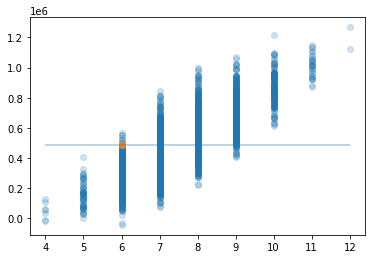

In [23]:
predict_x = 6
predict_y = (m*predict_x)+b
print(predict_y)

plt.plot(grade_test, regression_line, alpha=.3)
plt.scatter(grade_test, price_test, alpha=.2)
plt.scatter(6, predict_y, alpha=1)

In [24]:
# check accuracy with mean sq 
print('mean sq :', np.mean((y_pred - y_test)**2))
print('slope :', calc_slope(y_test, y_pred))

mean sq : price    1.710633e+10
dtype: float64
slope : price    0.692797
dtype: float64


In [25]:
cv = KFold(n_splits=10)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
k_test = cross_val_predict(classifier_pipeline, x_test, y_test, cv=5)
k_train = cross_val_predict(classifier_pipeline, x_train, y_train, cv=5)

In [26]:
print('test RMSE:  ' + str(round(sqrt(mean_squared_error(y_test, k_test)), 2)))
print('test R Squared: ' + str(round(r2_score(y_test, k_test), 2)))
print('test Slope: ' + str(calc_slope(y_test, k_test)))

test RMSE:  123420.21
test R Squared: 0.72
test Slope: price    0.657732
dtype: float64


In [27]:
print('pred RMSE:  ' + str(round(sqrt(mean_squared_error(y_train, k_train)), 2)))
print('pred R Squared: ' + str(round(r2_score(k_train, y_train), 2)))
print('pred Slope: ' + str(calc_slope(k_train, y_train)))

pred RMSE:  111293.1
pred R Squared: 0.68
pred Slope: price    1.052894
dtype: float64


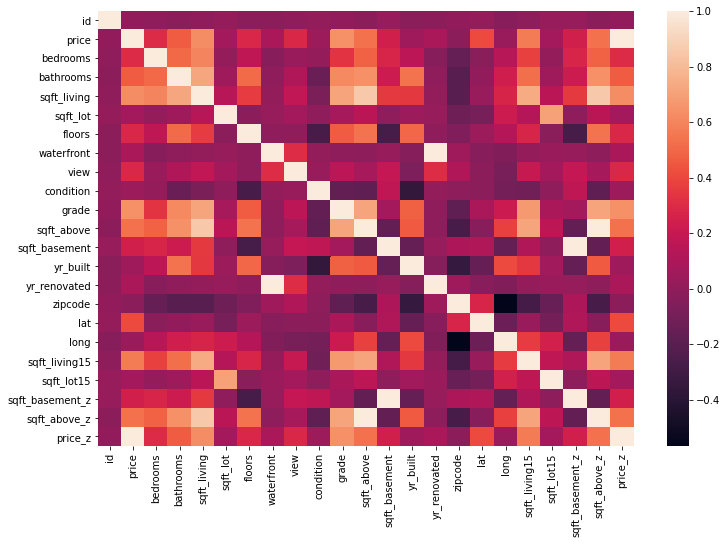

In [30]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()